## Лабораторная работа №7
## Задача Коши

*Выполнил: * Злобин Дмитрий Алексеевич, вариант 22

$$y'''-2y''+y'-2y=cos(x)*exp(2x)$$
$$ y(0)=1,y'(0)=0,y''(0)=0$$
+ Решить данное уравнение чисто неявным методом с заданной относительной точностью $\epsilon$ = 0.01

*Теоретическая часть: *
***
y', f' - вектора
 
 так же дано условие: y(a) = $y_0$
 
 Рассмотрим сам метод:
 
 Он довольно простой. 
 
 $$ \frac{y_{n+1} - y_n}{h}  - f(x_n, y_n) = 0$$
 
 h - шаг
 
 Необходимо лишь решить следующие уравнение:
 
 $$y_{n+1} = hf(x_n, y_n) + y_n$$


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos,sin
from scipy import *
from scipy.linalg import *
%matplotlib inline 

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy import *
from scipy.linalg import *

+ Решение задачи Коши с помощью неявной функции и построение фазового портрета

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   2.35602868e-02]
 [  1.00000000e+00   1.84064741e-04   4.76129277e-02]
 [  1.00000144e+00   5.56040739e-04   7.21656228e-02]
 [  1.00000578e+00   1.11983467e-03   9.72261916e-02]
 [  1.00001453e+00   1.87941429e-03   1.22802575e-01]
 [  1.00002921e+00   2.83880941e-03   1.48902837e-01]
 [  1.00005139e+00   4.00211282e-03   1.75535166e-01]
 [  1.00008266e+00   5.37348131e-03   2.02707877e-01]
 [  1.00012464e+00   6.95713660e-03   2.30429413e-01]
 [  1.00017899e+00   8.75736639e-03   2.58708345e-01]
 [  1.00024741e+00   1.07785253e-02   2.87553379e-01]
 [  1.00033162e+00   1.30250361e-02   3.16973350e-01]
 [  1.00043337e+00   1.55013904e-02   3.46977232e-01]
 [  1.00055448e+00   1.82121500e-02   3.77574133e-01]
 [  1.00069676e+00   2.11619479e-02   4.08773300e-01]
 [  1.00086209e+00   2.43554894e-02   4.40584122e-01]
 [  1.00105237e+00   2.77975528e-02   4.73016129e-01]
 [  1.00126953e+00   3.14929

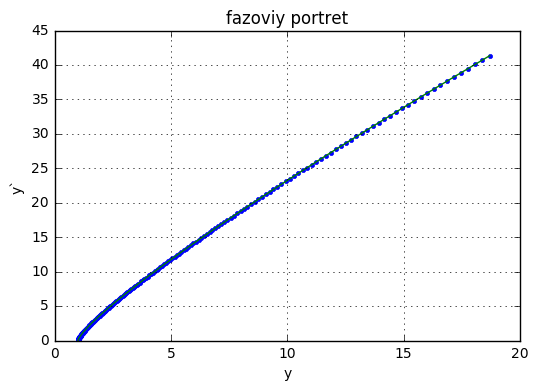

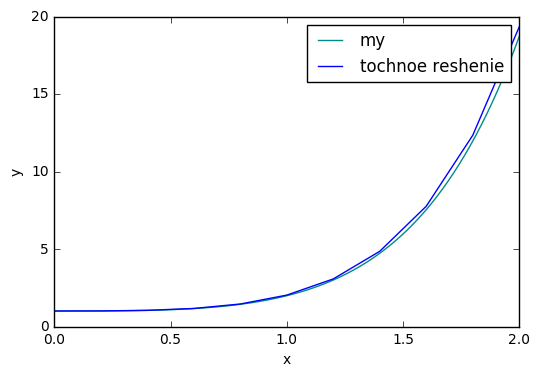

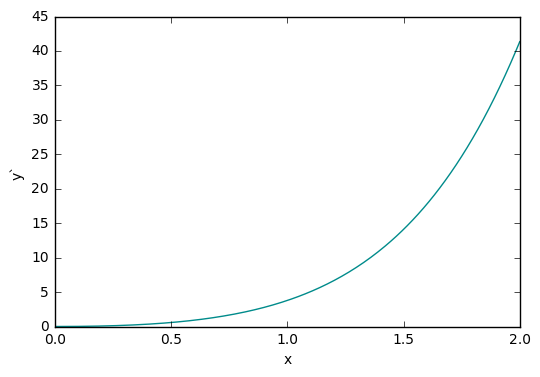

In [19]:
import numpy as np
import matplotlib.pyplot as plt
eps = 0.01
def rightpart(x, y1, y2, y3):
    right = np.zeros(3)
    right[0] = y2
    right[1] = y3
    right[2]=2*y3-y2+2*y1+cos(x)*exp(2*x)
    return right
a, b = 0, 2
y1 , y2, y3 = 1, 0, 0
h = 1
q = 1

matrix = np.zeros((5,5))

while q >= eps:
    step = int((b - a) / h) + 1
    back = matrix
    matrix = np.zeros((step, 3))    
    matrix[0][0] = y1
    matrix[0][1] = y2
    matrix [0][2] = y3
    x = a

    for i in range(1, step):
        x = x+h
        matrix[i] = matrix[i - 1] + h * rightpart(x, matrix[i - 1][0], matrix[i - 1][1],matrix[i-1][2])
        
    equa = np.zeros((int(step/2), 3))
    for i in range(int(step/2)):
        equa[i][0] = matrix[2*i][0]
        equa[i][1] = matrix[2 * i][1]
        equa[i][2]= matrix[2*i][2]
    q = abs(np.linalg.norm(equa)- np.linalg.norm(back))/np.linalg.norm(equa)
    h = h/2
print(matrix)
print('x', x)
xnew = np.zeros(step)
ynew = np.zeros(step)
x = np.zeros(step)
x[0] = 0
for i in range(step):
    if i > 0 : 
        x[i] = x[i-1] + 2*h 
    xnew[i] = matrix[i][0]
    ynew[i] = matrix[i][1]
plt.plot(xnew ,ynew, '.')
plt.plot(xnew, ynew,)
plt.xlabel('y')
plt.ylabel('y`')
plt.title('fazoviy portret')
plt.grid(True)
plt.show()
def fun(x):
    return 1/40*(8*exp(2*x)+(5*exp(2*x)-11)*sin(x)+(37-5*exp(2*x))*cos(x))
t = np.arange(0, 2+.2, .2)
yt = np.zeros(len(t))
for i in range(len(t)):
    yt[i] = fun(t[i])
plt.plot(x, xnew, color = '#008B8B', label = 'my')

plt.plot(t, yt, label = 'tochnoe reshenie')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

plt.plot(x, ynew, color = '#008B8B')
plt.xlabel('x')
plt.ylabel('y`')
plt.show()